<a href="https://colab.research.google.com/github/dashielle/MIS491/blob/main/Netflix_Week2%263.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

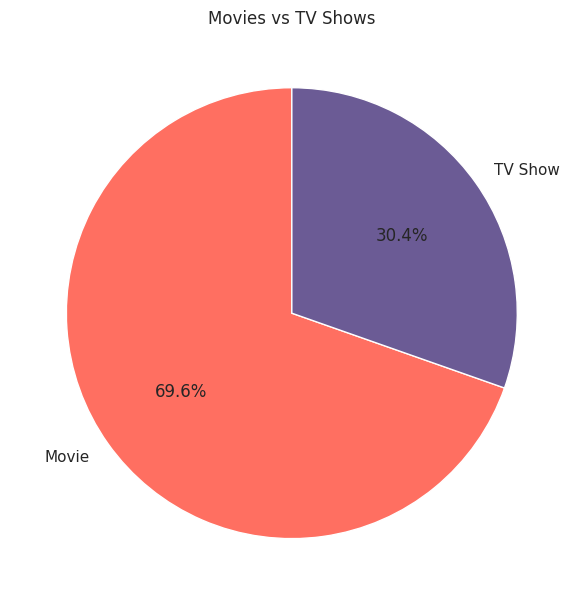

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Load and preprocess
df = pd.read_csv('netflix_titles.csv')
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

movies = df[df['type'] == 'Movie'].copy()
tv_shows = df[df['type'] == 'TV Show'].copy()

# Genre extractor
def extract_genres(genre_series):
    genres = genre_series.dropna().str.split(', ')
    return Counter([genre for sublist in genres for genre in sublist])

# Setup for plots
sns.set(style='whitegrid')

# 1. Content Breakdown

# Type count plot
plt.figure(figsize=(6, 8))
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#ff6f61', '#6b5b95' ], startangle=90)
plt.title('Movies vs TV Shows')
plt.ylabel('')  # Remove the ylabel for pie chart
plt.tight_layout()
plt.show()

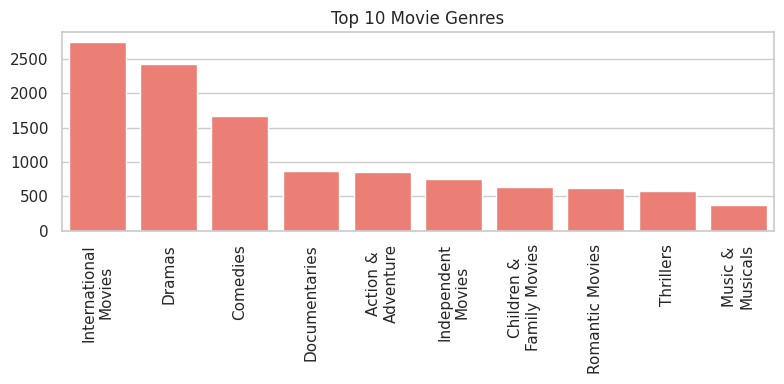

<Figure size 640x480 with 0 Axes>

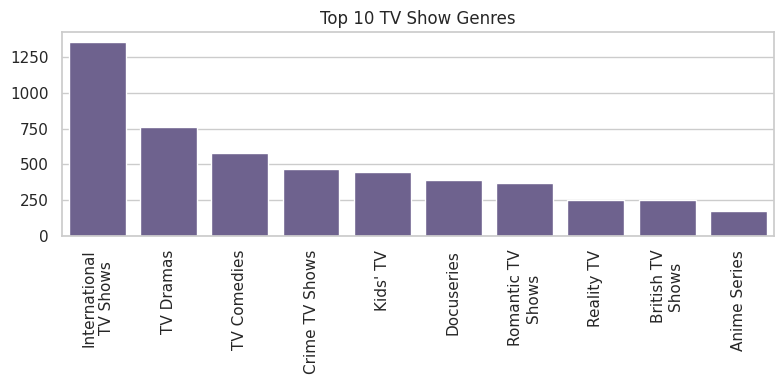

In [ ]:
# 1. Content Breakdown

import textwrap

# Genre plots
movie_genres = extract_genres(movies['listed_in']).most_common(10)
tv_genres = extract_genres(tv_shows['listed_in']).most_common(10)

# Movie genres
plt.figure(figsize=(8, 4))
sns.barplot(x=[genre for genre, _ in movie_genres],
            y=[count for _, count in movie_genres],
            color="#ff6f61")  # Specify color here
plt.title('Top 10 Movie Genres')
labels = [textwrap.fill(genre, 15) for genre, _ in movie_genres]
plt.xticks(range(len(labels)), labels, rotation=90, ha='center')
plt.tight_layout()
plt.show()

# Add space before the next plot
plt.subplots_adjust(hspace=2.0)

# TV show genres
plt.figure(figsize=(8, 4))
sns.barplot(x=[genre for genre, _ in tv_genres],
            y=[count for _, count in tv_genres],
            color= "#6b5b95")
plt.title('Top 10 TV Show Genres')
labels = [textwrap.fill(genre, 15) for genre, _ in tv_genres]
plt.xticks(range(len(labels)), labels, rotation=90, ha='center')
plt.tight_layout()
plt.show()

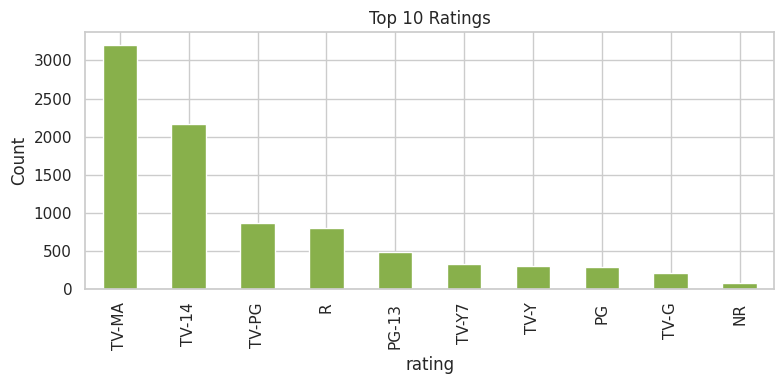

In [ ]:
# 1. Content Breakdown

# Ratings
plt.figure(figsize=(8, 4))
df['rating'].value_counts().head(10).plot(kind='bar', color='#88b04b')
plt.title('Top 10 Ratings')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

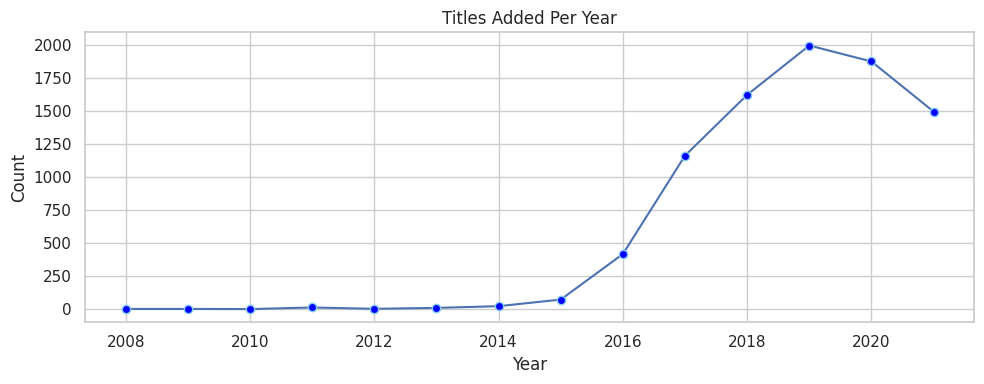

In [ ]:
# 2. Temporal Analysis

# Titles per year
plt.figure(figsize=(10, 4))
df['year_added'].value_counts().sort_index().plot(kind='line',  marker='o', markerfacecolor='blue', markeredgecolor='skyblue')
plt.title('Titles Added Per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


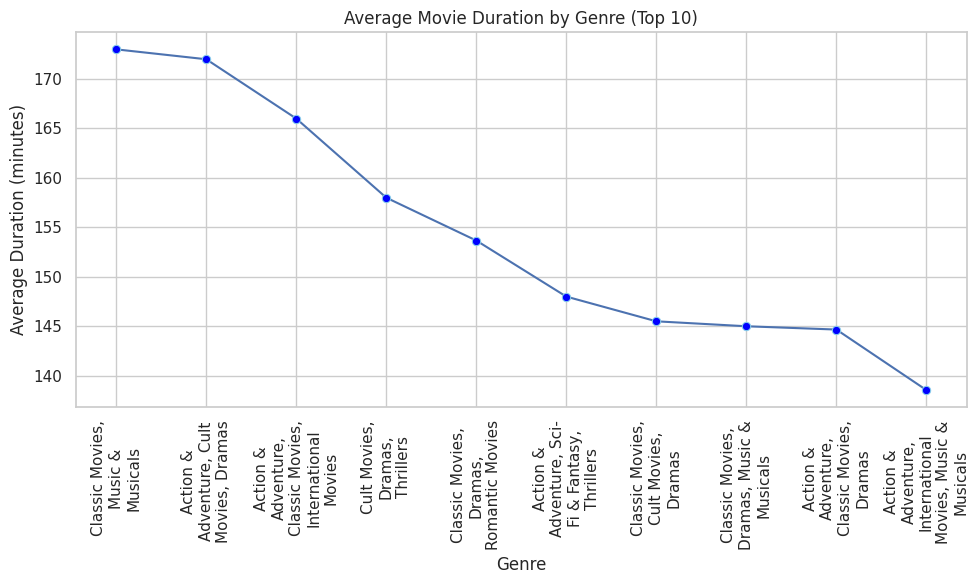

In [ ]:
# Assuming your DataFrame is named 'df' and has a 'duration' column for movies
movies = df[df['type'] == 'Movie'].copy()  # Filter for movies only

# Extract duration in minutes, handling NaNs
movies['duration_minutes'] = pd.to_numeric(movies['duration'].str.extract('(\d+)', expand=False), errors='coerce').astype('Int64')

# Group by genre and calculate average duration
genre_duration = movies.groupby('listed_in')['duration_minutes'].mean().reset_index()

# Sort by average duration and select top 10
genre_duration = genre_duration.sort_values(by='duration_minutes', ascending=False).head(10)

# Create the plot (Line graph)
plt.figure(figsize=(10, 6))
sns.lineplot(x='listed_in', y='duration_minutes', data=genre_duration, marker='o', markerfacecolor='blue', markeredgecolor='skyblue')
plt.title('Average Movie Duration by Genre (Top 10)')
plt.xlabel('Genre')
plt.ylabel('Average Duration (minutes)')
labels = [textwrap.fill(genre, 15) for genre in genre_duration['listed_in']]  # Wrap genre names
plt.xticks(range(len(labels)), labels, rotation=90, ha='center')  # Set wrapped labels
plt.tight_layout()
plt.show()

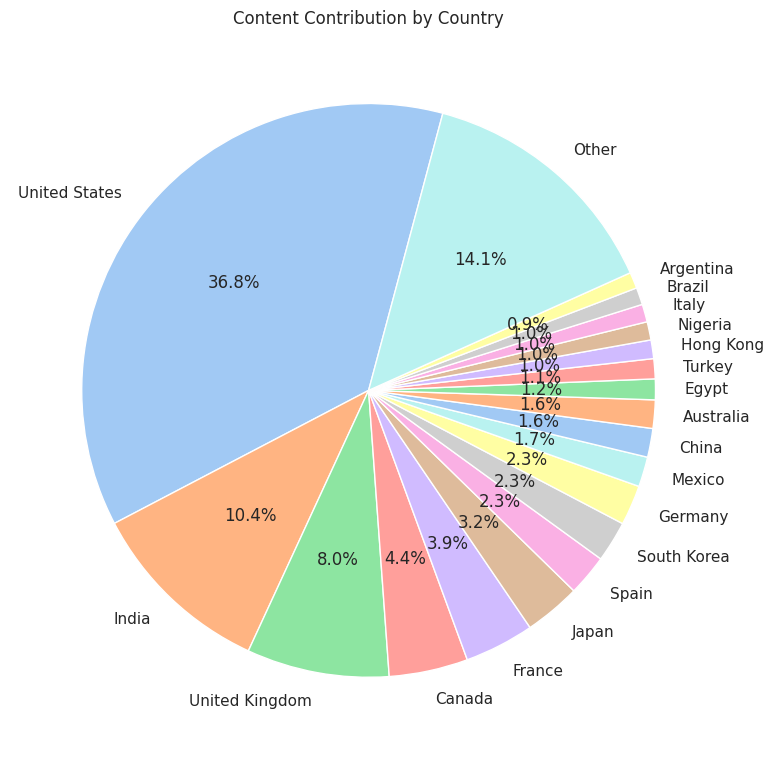

In [ ]:
# 3. Geographic Analysis

# Count country appearances
all_countries = Counter(
    country.strip()
    for countries in df['country'].dropna().str.split(', ')
    for country in countries
)

# Convert to DataFrame
country_counts_df = pd.DataFrame(all_countries.items(), columns=['country', 'count'])

# Top 19 countries + combine others
top_n = 19
top_countries = country_counts_df.sort_values(by='count', ascending=False).head(top_n)
other_count = country_counts_df['count'].sum() - top_countries['count'].sum()

# Add 'Other' slice
top_countries = pd.concat([
    top_countries,
    pd.DataFrame([{'country': 'Other', 'count': other_count}])
])

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_countries['count'], labels=top_countries['country'], autopct='%1.1f%%',
        startangle=75, colors=sns.color_palette('pastel'))
plt.title('Content Contribution by Country')
plt.tight_layout()
plt.show()


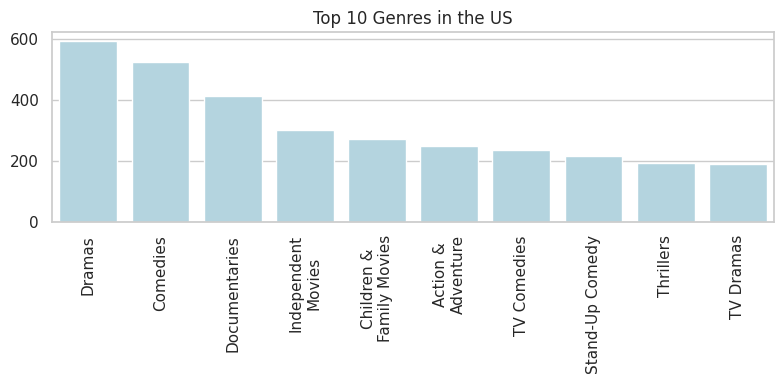

In [ ]:
# Country vs genre analysis (example: top genres in the US)

us_genres = extract_genres(df[df['country'] == 'United States']['listed_in']).most_common(10)
plt.figure(figsize=(8, 4))
sns.barplot(x=[genre for genre, _ in us_genres], y=[count for _, count in us_genres], color="lightblue")
plt.title('Top 10 Genres in the US')
labels = [textwrap.fill(genre, 15) for genre, _ in us_genres]
plt.xticks(range(len(labels)), labels, rotation=90, ha='center')
plt.tight_layout()
plt.show()


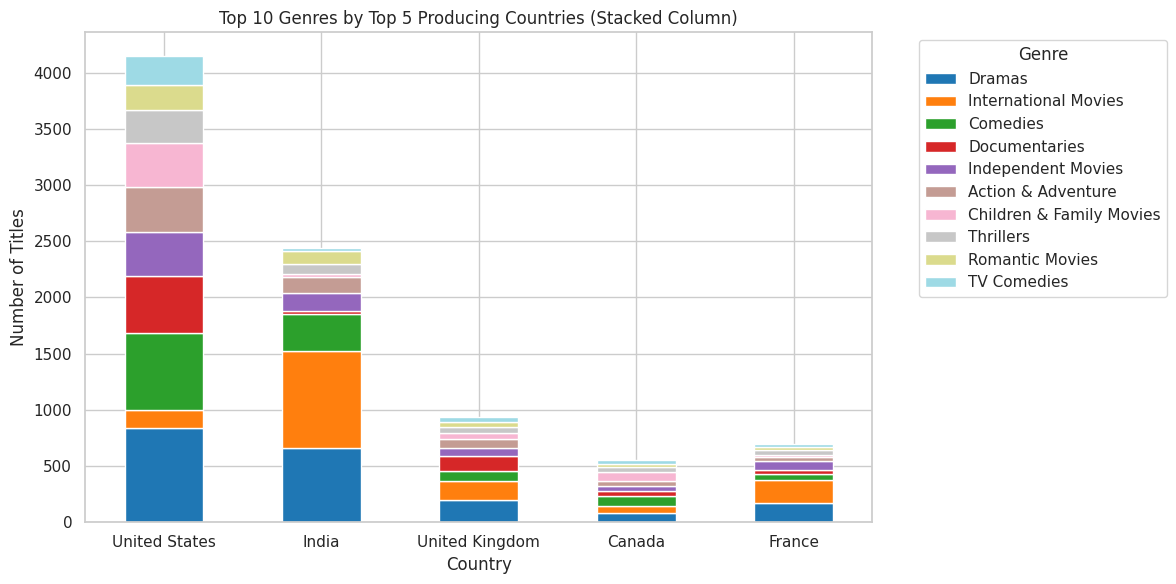

In [ ]:
# Assuming you have your data loaded in a DataFrame called 'df'

# Get the top 5 producing countries
country_counts = Counter([country.strip() for sublist in df['country'].dropna().str.split(', ') for country in sublist])
top_5_countries = [country for country, _ in country_counts.most_common(5)]

# Filter the DataFrame for the top 5 countries
filtered_df = df[df['country'].str.contains('|'.join(top_5_countries), na=False)]

# Extract genres for each country
genre_by_country = {}
for country in top_5_countries:
    genre_by_country[country] = extract_genres(filtered_df[filtered_df['country'].str.contains(country)]['listed_in'])

# Convert the genre data to a DataFrame for plotting
genre_by_country_df = pd.DataFrame(genre_by_country).fillna(0).T  # Transpose for plotting

# Select the top 10 genres for better visualization
top_10_genres = genre_by_country_df.sum().sort_values(ascending=False).head(10).index
genre_by_country_df = genre_by_country_df[top_10_genres]

# Create the plot
ax = genre_by_country_df.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    colormap='tab20'  # Choose a suitable colormap
)

# Customize the plot
plt.title('Top 10 Genres by Top 5 Producing Countries (Stacked Column)')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal for better readability
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.tight_layout()  # Adjust layout for better spacing

# Display the plot
plt.show()